<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_YB_week10_1_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**05 _ 회귀**

#### 01 회귀소개

회귀: 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법

<독립변수 개수>
- 1개: 단일 회귀
- 여러 개: 다중 회귀

<회귀 계수의 결합>
- 선형: 선형 회귀
- 비선형: 비선형 회귀

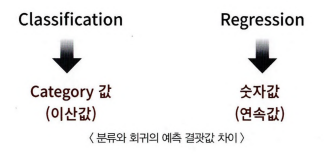

- 일반 선형 회귀: 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수 최적화하고, 규제(regulation) 적용하지 않은 모델
- 릿지(Ridge): 선형 회귀에 L2 규제 추가한 회귀 모델 => 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
- 라쏘(Lasso): 선형 회귀에 L1 규제 적용한 방식 => 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않도록 하는 것
- 엘라스틱넷(ElasticNet): L2, L1규제 함께 결합한 모델
- 로지스틱 회귀(Logistic Regression): 분류에 사용되는 선형 모델

#### 02 단순 선형 회귀를 통한 회귀 이해

- 독립변수 하나, 종속변수도 하나인 선형 회귀

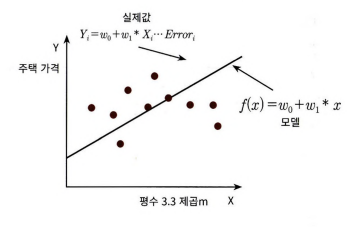

- 잔차: 실제 값과 회귀 모델의 차이에 따른 오류 값(남은 오류)
- 최적의 회귀 모델을 만드는 것은 바로 전체 데이터의 잔차(오류 값)합이 최소가 되는 모델을 만드는 것 = 오류 값 합이 최소가 될 수 있는 최적 회귀 계수를 찾는 것

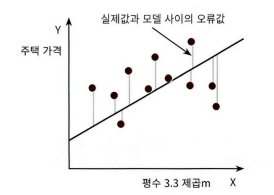

- **Mean Absolute Error**: 절댓값을 취해 더함
- **RSS(Residual Sum of Square)**: 오류 값의 제곱을 구해서 더함 = Error^2

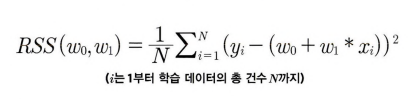

#### 03 비용 최소화하기 - 경사 하강법(Graient Descent) 소개

- 경사 하강법: 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법
- 반복적으로 비용 함수의 반환 값 => 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터 지속적 보정

*=> 어떻게 하면 오류가 작아지는 방향으로 W값을 보정할 수 있을까?*

(1) 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트

(2) 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환

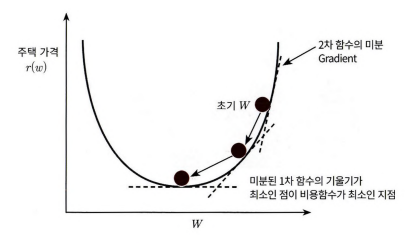

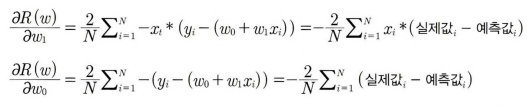

<R(w)를 최소화하는 w0, w1의 값은 r(w)를 w0,w1으로 순차적으로 편미분 수행>

**Step 1:** w0, w1를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산

**Step 2:** 값을 업데이트하고 다시 비용 함수의 값을 계산

**Step 3:** 비용 함수가 감소하는 방향성으로 주어진 횟수만큼 Step 2를 반복하면서 w0,w1 계속 업데이트

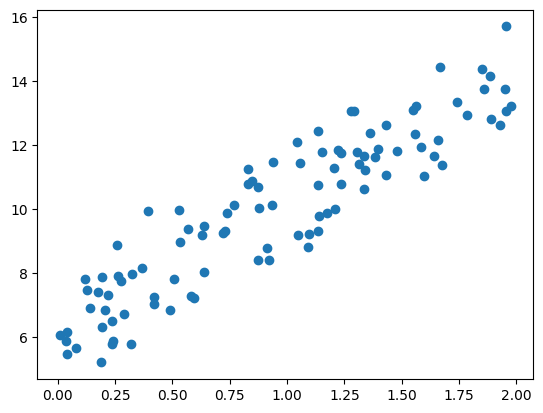

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [ ]:
def get_cost(y,y_pred):
    N = len(y)
    cost = (1/N) * np.sum((y-y_pred)**2)
    return cost

In [ ]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * np.dot(X.T, diff)
    w0_update = -(2/N) * learning_rate * np.dot(w0_factors.T, diff)

    return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=1000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [ ]:
def get_cost(y, y_pred):
    N = len(y)
    cost = (1/N) * np.sum((y-y_pred)**2)
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


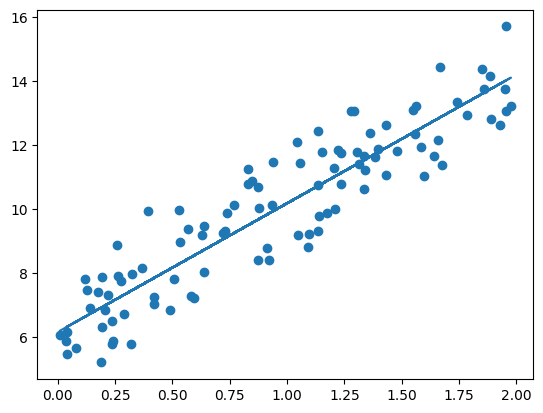

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred)

- 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화 수행 시간이 매우 오래  걸림 => 확률적 경사 하강법(Stochastic Gradient Descent)
- 확률적 경사 하강법: 일부 데이터만 이용해 w가 업데이트되는 값을 계산하여 경사 하강법에 비해 빠른 속도 보장

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


- (미니 배치) 확률적 경사 하강법 결과와 경사 하강법 w1, w0 결과 큰 차이 없고, 예측 오류 비용도 큰 예측 성능상 차이가 없음
- 큰 데이터 처리할 경우 일반적으로 확률적 경사 하강법 이용

*피처가 여러 개인 경우 어떻게 회귀 계수를 도출하는가?*

**Y hat = w0 + w1 * X2 + w2 * X2 + ... + wn * Xn**: 회귀 계수가 많아지더라도 선형대수로 간단하게 예측값 도출할 수 있음

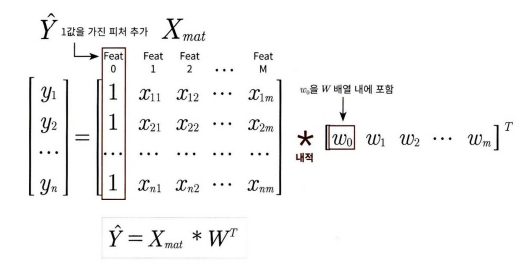

#### 04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

**LinearRegression 클래스 - Ordinary Least Squares**

LinearRegression 클래스: 예측값과 실제 값의 RSS(Residual Sum of Squares) 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스

- fit() 메서드로 X, y 배열을 입력받으면 회귀 계수(Cosffiecients) W를 coef_ 속성에 저장

<입력 파라미터>

- fit_intercept: 불린 값, 디폴트 True / intercept(절편) 값을 계산할 것인지 말지 지정
- normalize: 불린 값, 디폴트 False / fit_intercept가 True이면 회귀 수행하기 전 입력 데이터 세트 정규화

<속성>

- coef_: fill() 메서드 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성
- intercept_

**회귀 평가 지표**

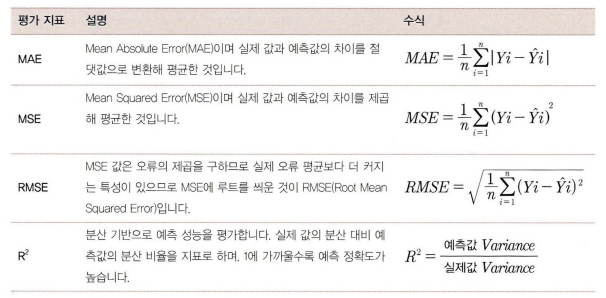

- MAE: metrics.mean_absolute_error / 'neg_mean_absolute_error'
- MSE: metrics.mean_squared_error / 'neg_mean_squared_error'
- RMSE: metrics.mean_squared_error(squared=Fasle) / 'neg_root_mean_squared_error'
- MSLE: metrics.mean_squared_log_error / 'neg_mean_squared_log_error'
- R^2: metrics.r2_score / 'r2'

사이킷런 Scoring 함수에 회귀 평가 지표 값 보정: -1을 원래 평가 지표 값에 곱해 음수(Negative)로 만들어 작은 오류 값이 더 큰 숫자로 인식하게 함

**LInearRegression을 이용해 보스턴 주택 가격 회귀 구현**

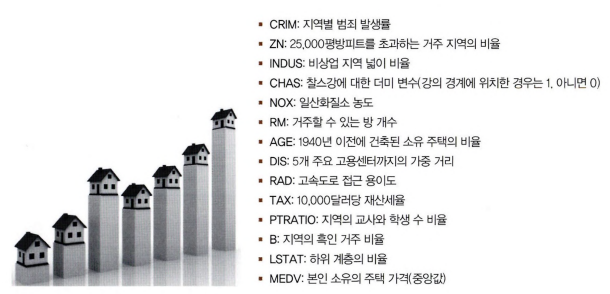

In [ ]:
pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.25.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트 Target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


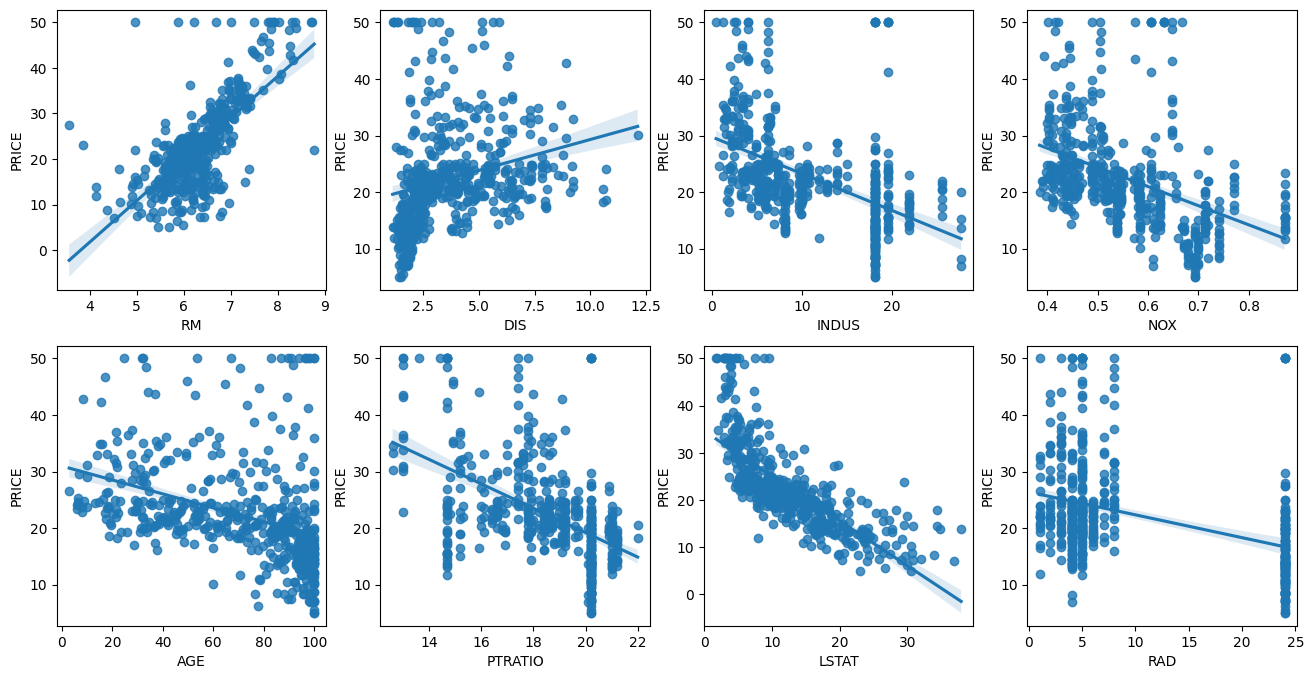

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'DIS', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

- RM(방 개수): 양 방향 선형성(Positive Linearity)이 가장 큼
- LSTAT(하위 계층 비율): 음 방향 선형성(Negative Linearity)이 가장 큼
- LSTAT이 적을수록 PRICE가 증가

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3,
                                                    random_state = 156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164485
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
AGE,0.0
TAX,-0.0
B,0.0
CRIM,-0.1
LSTAT,-0.6


- 회귀는 MSE 값이 낮을수록 좋은 회귀 모델이므로 사이킷런 metric 평가 기준에 MSE 부합시키기 위해 scoring='neg_mean_squared_error'로 사이킷런 Scoring 함수 호출하여 모델에서 계산된 MSE 값에 -1 곱하여 양의 값인 원래 모델에서 계산된 MSE 값으로 변환

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


#### 05 다항 회귀와 과(대)적합/과소적합 이해

**다항 회귀 이해**
- 다항(Polynomial) 회귀: 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
$y = w0 + w1*x1 + w2*x2 + w3*x1*x2 + w4*x1^2 + w5*x2^2$

- 다항 회귀는 선형 회귀임
- 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 예측 성능이 더 높음

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [ ]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression 에 3차 다항식 계수 features와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 과소적합 및 과적합 이해**

원래 데이터 세트 피처 X와 target_y가 잡음(Noise)이 포함된 다항식의 코사인(Cosine) 그래프 관계를 갖도록 함 => 다항 회귀와 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도 비교

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X) :
    return np.cos(1.5 * np.pi *X)

# X 는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


<function matplotlib.pyplot.show(close=None, block=None)>

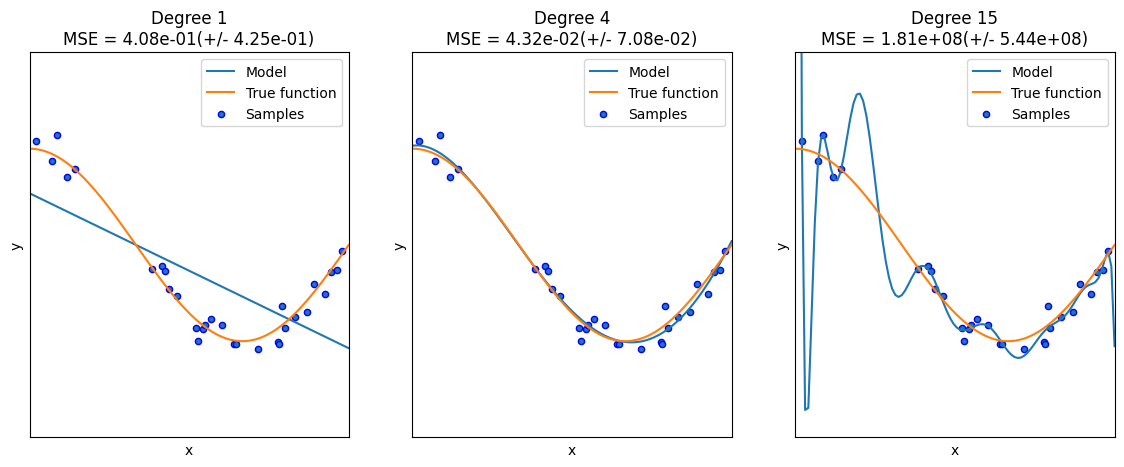

In [ ]:
plt.figure(figsize = (14, 5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '-',label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show

- Degree 1 예측 곡선: 단순 선형 회귀와 같음, 예측 곡선이 학습 데이터 패턴을 제대로 반영하지 못한 과소 적합 모델
- Degree 4 예측 곡선: 실제 데이터 세트와 유사, 코사인 곡선 기반으로 테스트 데이터 잘 예측한 곡선 모델
- Degree 15 예측 곡선: 데이터 세트 변동 잡음값까지 지나치게 반응하여 예측 곡선이 학습 데이터 세트만 정확히 이해 + 테스트 값의 실제 곡선과는 완전 다른 과적합 예측 곡선

**편향-분산 트레이트오프(Bias-Variance Trade off)**

- 고편향(High Bias) => Degree1: 매우 단순화된 모델로 지나치게 한 방향성으로 치우침
- 고분산(High Variance) => Degree15: 학습 데이터 하나 하나의 특성 반영하면서 매우 복잡한 모델, 지나치게 높은 변동성
- 편향이 높으면 분산은 낮아짐(과소적합), 분산이 높으면 편향이 낮아짐(과적합)
- 편향이 너무 높으면 전체 오류가 높고 편향을 점점 낮추면 동시에 분산 높아지고 전체 오류도 낮아짐
- *'골디락스'*(편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 지점)를 통과하면서 분산을 지속적으로 높이면 전체 오류 값 증가하면서 예측 성능 다시 저하

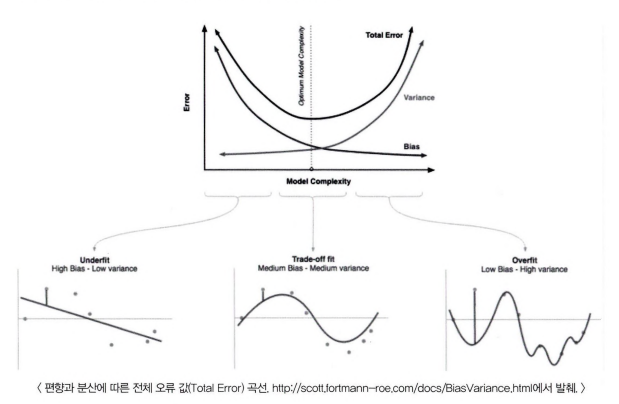